**Project-2**

-->Bank marketing dataset

**Goal:** Predict whether a customer will subscribe to a bank term deposit.

**Features:** Age, job, marital status, education, campaign contact info, etc.


**Import Important Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Load the dataset**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/6-weeks Internship/Dataset/P-2 bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**Analyze the data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Data Preprocessing**

In [9]:
#Handle Categorical Variables

cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [10]:
# Encode target variable 'deposit' first
le = LabelEncoder()
data['deposit'] = le.fit_transform(data['deposit'])  # yes=1, no=0

# Encode other categorical columns using get_dummies
df_encoded = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'], drop_first=True)


In [12]:
df_encoded['pdays'] = df_encoded['pdays'].replace(999, -1)


In [13]:
scaler = StandardScaler()
num_cols = ['age','balance','day','duration','campaign','pdays','previous']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


**Exploratory Data Analysis (EDA)**

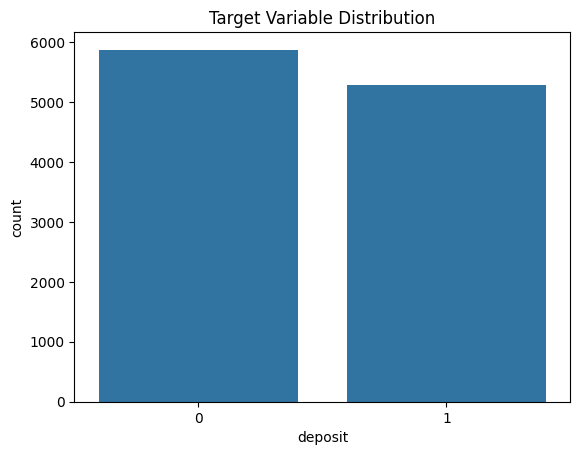

,proportion
deposit,
0,0.52616
1,0.47384


In [16]:
sns.countplot(x='deposit', data=data)
plt.title("Target Variable Distribution")
plt.show()

data['deposit'].value_counts(normalize=True)


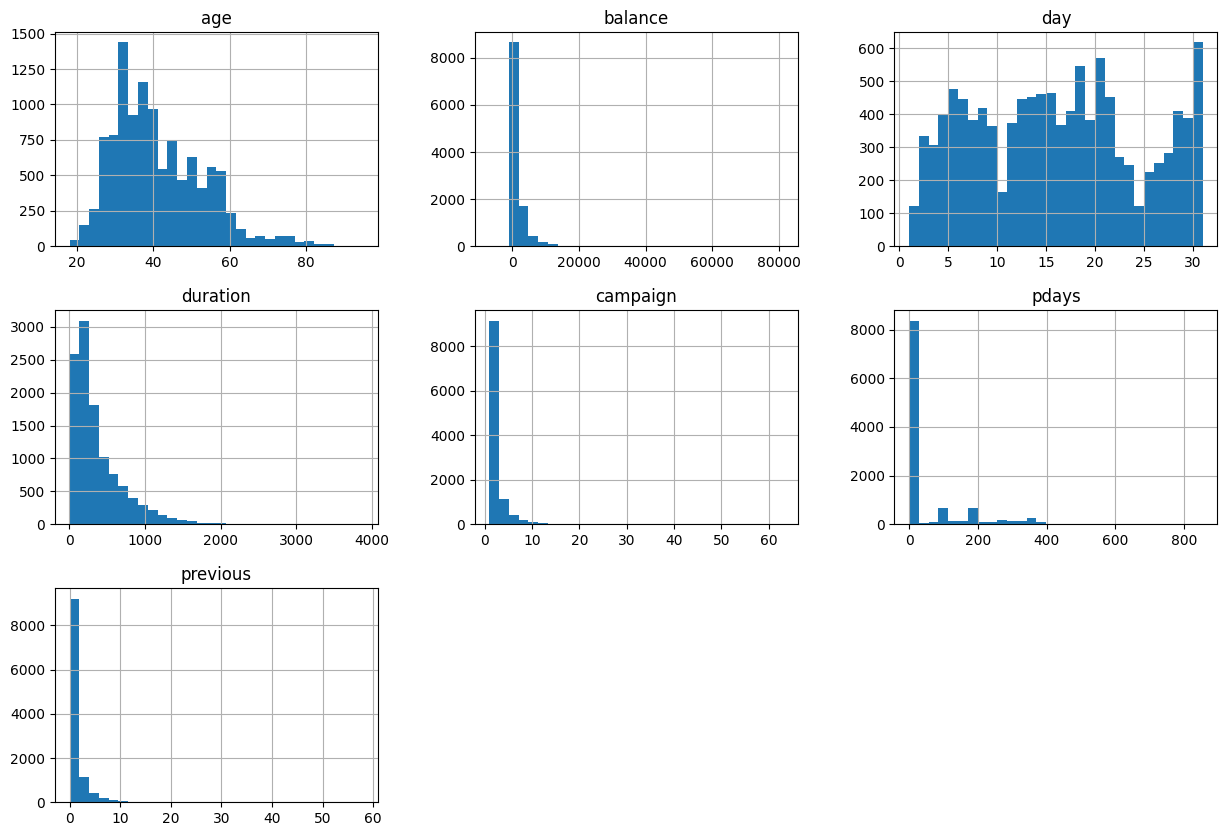

In [17]:
#Numerical Features Distribution

data[num_cols].hist(bins=30, figsize=(15,10))
plt.show()

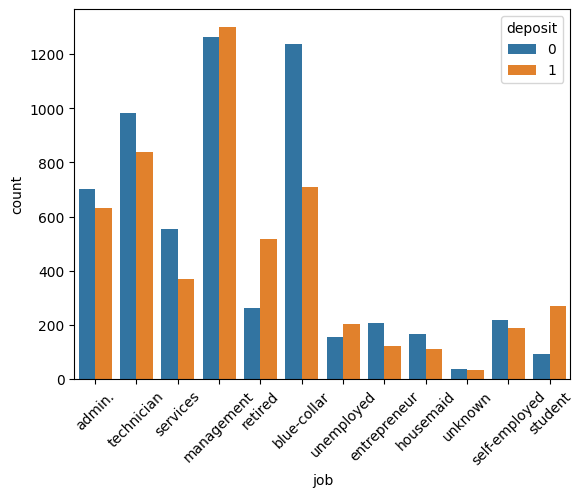

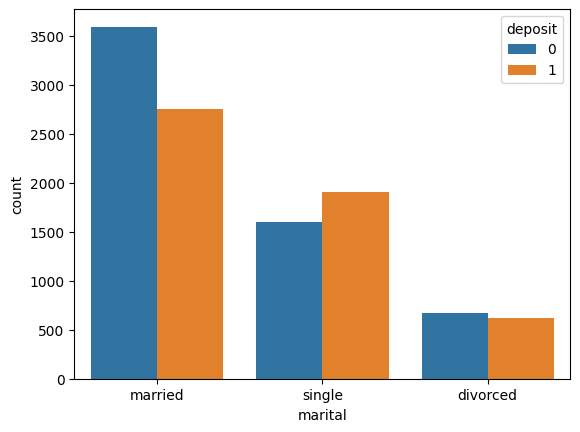

In [18]:
#Categorical Features Analysis

sns.countplot(x='job', hue='deposit', data=data)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='marital', hue='deposit', data=data)
plt.show()

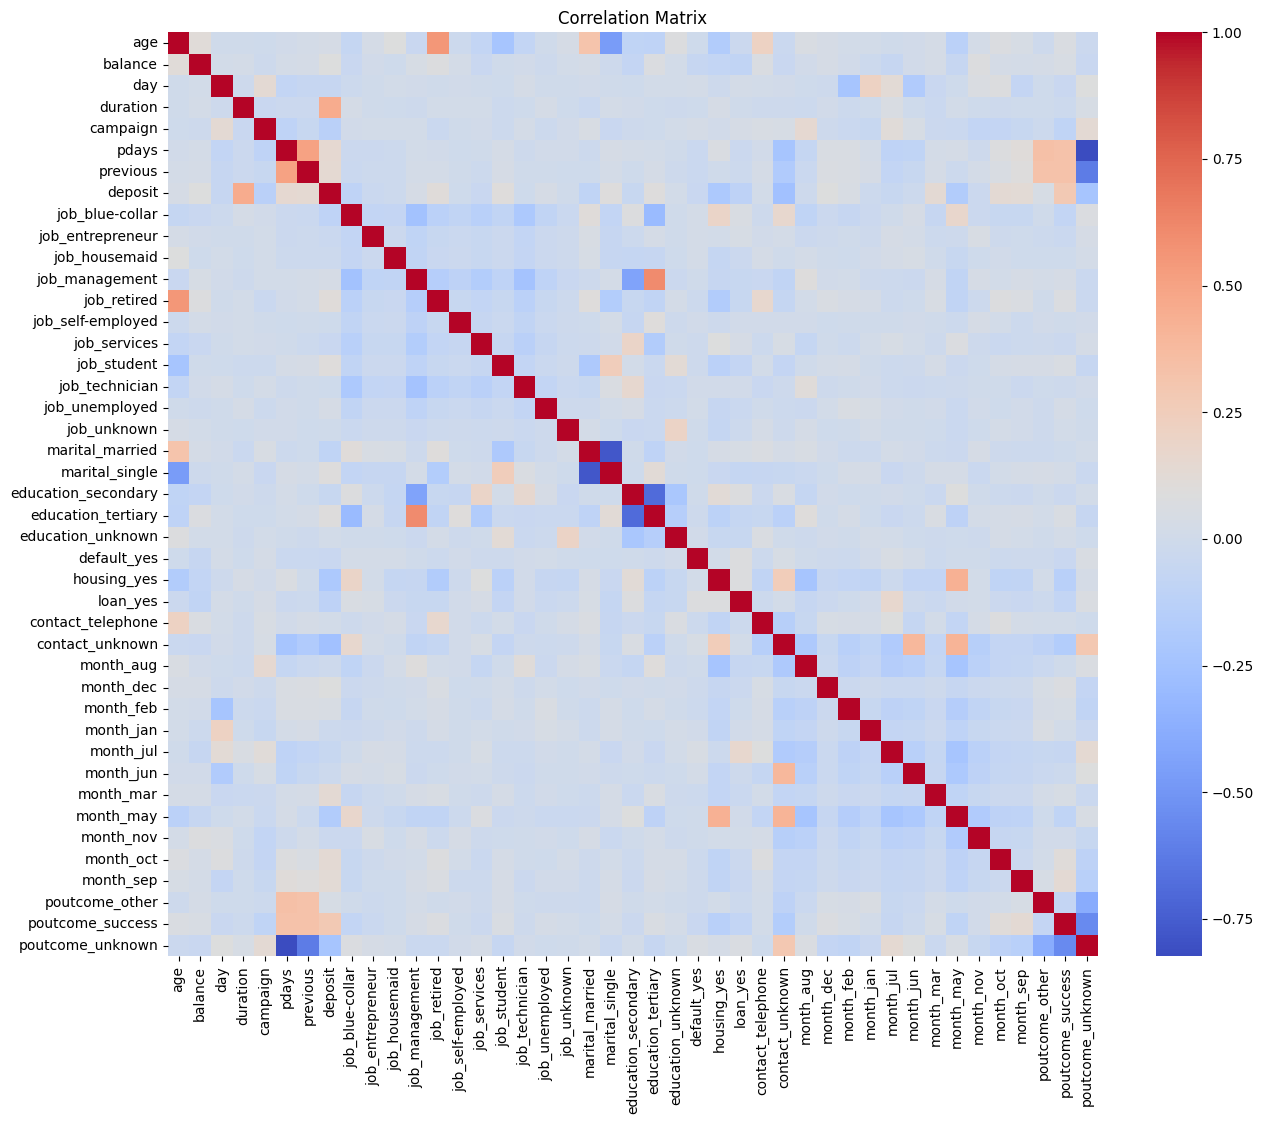

In [19]:
#Correlation Analysis

corr = df_encoded.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

**Train/Test Split**

In [20]:

X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Model Building**

In [21]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8248992386923422
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1175
           1       0.83      0.80      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



**Random Forest Classifier**

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1175
           1       0.83      0.89      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



**Evaluate Models with Confusion Matrix**

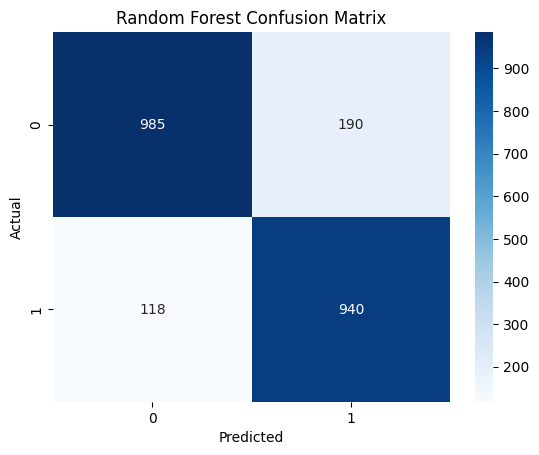

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Feature Importance (Random Forest)**

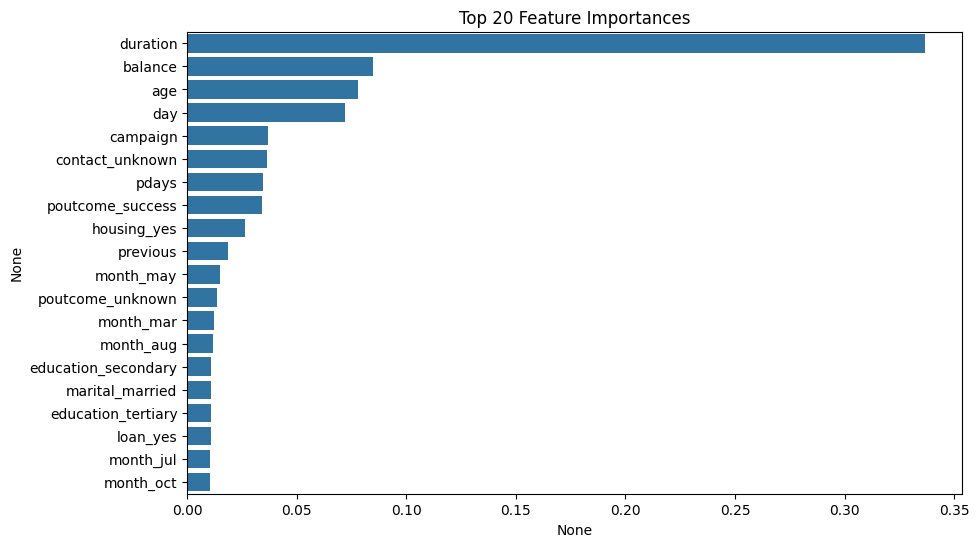

In [24]:
importances = rf_model.feature_importances_
features = X_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)[:20]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Top 20 Feature Importances")
plt.show()


Define the manual prediction function

In [25]:
def predict_new_customer(rf_model, scaler, input_dict):
    """
    Predict whether a new customer will subscribe to a term deposit using trained Random Forest.

    Parameters:
    - rf_model: your trained RandomForestClassifier
    - scaler: your trained StandardScaler for numeric features
    - input_dict: dictionary with customer data (numeric + categorical)

    Returns:
    - prediction: 0 = No, 1 = Yes
    - probability: probability of subscribing
    """
    import pandas as pd
    import numpy as np

    # Convert input dictionary to DataFrame
    data = pd.DataFrame([input_dict])

    # Ensure all columns from training exist in df
    for col in X_train.columns:
        if col not in data.columns:
           data[col] = 0  # fill missing columns with 0

    # Reorder columns to match training data
    data = data[X_train.columns]

    # Scale numeric columns (same as during training)
    num_cols = ['age','balance','day','duration','campaign','pdays','previous']
    data[num_cols] = scaler.transform(data[num_cols])

    # Predict
    pred = rf_model.predict(data)[0]
    prob = rf_model.predict_proba(data)[0][1]

    return pred, prob


In [26]:
new_customer = {
    'age': 40,
    'balance': 1500,
    'day': 15,
    'duration': 200,
    'campaign': 2,
    'pdays': -1,  # never contacted before
    'previous': 0,
    # Example categorical one-hot features
    'job_management': 1,
    'marital_married': 1,
    'education_secondary': 1,
    'default_yes': 0,
    'housing_yes': 1,
    'loan_yes': 0,
    'contact_cellular': 1,
    'month_may': 1,
    'poutcome_unknown': 1
    # All other one-hot columns can be omitted (function fills with 0)
}


In [27]:
pred, prob = predict_new_customer(rf_model, scaler, new_customer)

if pred == 1:
    print("The customer is likely to SUBSCRIBE to a term deposit.")
else:
    print("The customer is likely NOT to subscribe to a term deposit.")

print(f"Probability of subscribing: {prob:.2f}")


The customer is likely NOT to subscribe to a term deposit.
Probability of subscribing: 0.19
